In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filename = '../shot_listed_dataset/CoverTypeNewNormalized.csv'
dataset=getData(filename).values.tolist()
random.shuffle(dataset)
dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
# print(dataset)

   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.850622  0.105556  0.150943                          0.045351   
1   0.879149  0.163889  0.188679                          0.426304   
2   0.767116  0.327778  0.320755                          0.068027   
3   0.791494  0.338889  0.226415                          0.294785   
4   0.867220  0.575000  0.584906                          0.385488   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.003509                         0.631060   
1                        0.189474                         0.177358   
2                        0.038596                         0.259652   
3                       -0.077193                         0.085486   
4                        0.314035                         0.074020   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.866142        0.874016          0.548   
1       0.897638        0.866142          0.500   
2    

In [3]:
def split_data(data):
    # splitting the data
    
    msk = np.random.rand(len(data)) < 0.8
    yy = [54] #test title is 54 after suffleing the dataframe 
    train = data[msk]
    test = data[~msk]
    x_train = train[train.columns[:train.shape[1] - 1]]  # all columns except the last are x variables
    y_train = train[yy[0]].tolist()  # the last column as y variable
    x_test = test[test.columns[:test.shape[1] - 1]]
    y_test = test[yy[0]].tolist()  # the last column as y variable
    y_train = [0 if i == 7 else i for i in y_train]  # replace label 7 with 0
    y_test = [0 if i == 7 else i for i in y_test]  # replace label 7 with 0
    return x_train, y_train, x_test, y_test

In [4]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [5]:
pcaTrain = PCA(n_components=40).fit(X)# --train-- pca with the "dataset" Dataframe
print(pcaTrain)
compressed_dataset_X= pcaTrain.transform(X) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X))
print(compressed_dataset_X)

PCA(n_components=40)
<class 'numpy.ndarray'>
19229
[[-6.78581499e-01 -2.69744245e-01  2.23739532e-01 ... -3.61957232e-02
   1.20826191e-03  9.85852324e-03]
 [-6.39808589e-01 -4.28577519e-01  3.23296119e-01 ... -5.55093559e-02
   7.55325816e-02 -8.77303554e-03]
 [ 1.36596226e-01  9.72874080e-01 -2.39688487e-01 ... -7.36861782e-03
   2.10842981e-02 -1.14175242e-03]
 ...
 [ 9.40974378e-01 -5.32425351e-01  7.78834918e-01 ... -9.41746036e-03
   3.16311080e-03 -6.49112838e-04]
 [ 9.82637280e-01 -4.31904468e-01  1.18386355e-01 ... -3.68725283e-02
   4.11070361e-02  4.10711613e-03]
 [-6.41250630e-01 -3.30208003e-01  3.31839192e-01 ... -6.34739453e-02
   2.10297344e-02  7.18982649e-03]]


In [6]:
# from NecessaryModules.splitData import split_data
X_train, y_train, X_test, y_test = split_data(dataset)
print(len(X_train))

15376


In [7]:
compressed_dataset_X_train= pcaTrain.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= pcaTrain.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
15376
[[-6.78581499e-01 -2.69744245e-01  2.23739532e-01 ... -3.61957232e-02
   1.20826191e-03  9.85852324e-03]
 [-6.39808589e-01 -4.28577519e-01  3.23296119e-01 ... -5.55093559e-02
   7.55325816e-02 -8.77303554e-03]
 [ 1.36596226e-01  9.72874080e-01 -2.39688487e-01 ... -7.36861782e-03
   2.10842981e-02 -1.14175242e-03]
 ...
 [ 9.40974378e-01 -5.32425351e-01  7.78834918e-01 ... -9.41746036e-03
   3.16311080e-03 -6.49112838e-04]
 [ 9.82637280e-01 -4.31904468e-01  1.18386355e-01 ... -3.68725283e-02
   4.11070361e-02  4.10711613e-03]
 [-6.41250630e-01 -3.30208003e-01  3.31839192e-01 ... -6.34739453e-02
   2.10297344e-02  7.18982649e-03]]
<class 'numpy.ndarray'>
3853
[[ 8.18845461e-01 -2.28093312e-01 -4.59751539e-01 ...  1.28969834e-02
  -1.35293880e-02 -8.58532677e-03]
 [-4.04432532e-01 -4.95969774e-01  3.25616691e-01 ... -2.87297738e-03
  -1.28340974e-02 -2.35568611e-03]
 [-5.98791121e-01 -3.93344838e-01  2.54652564e-01 ...  4.67100301e-02
  -6.40348883e-02  3.7091

# Tune D tree for Ada-boost

In [8]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)

model_dt.fit(compressed_dataset_X_train, y_train)

DecisionTreeClassifier(max_depth=12, max_features='sqrt')

In [9]:
# Finding mean absolute error
preds = model_dt.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.7062029587334544

In [10]:
# Defining the best parameter with optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
K = 5 # stratified 5 fold cross validation, The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)


train_tunned_dt = np.array(compressed_dataset_X)
target_train_tunned_dt = np.array(y)

# test = np.array(X)
# target_train = df_train['congestion'].values

# test_preds = np.zeros((len(test)))
oof_preds_dt = np.zeros((len(train_tunned_dt)))
abs_error_arr_dt=[]
def objective(trial):

 for train_index, val_index in (skf.split(compressed_dataset_X,y)):
    train_X, valid_X = train_tunned_dt[train_index], train_tunned_dt[val_index]
    train_Y, valid_Y = target_train_tunned_dt[train_index], target_train_tunned_dt[val_index]
    
        
        # train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=0)
    param = {
        'criterion':trial.suggest_categorical('criterion',["gini", "entropy", "log_loss"]), #The function to measure the quality of a split.
        'splitter':trial.suggest_categorical('splitter',["best", "random"]),
        'max_features':trial.suggest_categorical('max_features',['sqrt','log2',1,2,3,4,5,6,7,8,9,10,11]), #a categorical value can be an integer
        'random_state':trial.suggest_int('random_state',0,5),


        }
    model = DecisionTreeClassifier(**param)  
        
    model.fit(train_X,train_Y)
        
    preds = model.predict(valid_X)
    oof_preds_dt[val_index] = preds # preds gives total 3846 predicted value for valid_X


 
#  print(len(oof_preds_dt))
      
 mae = mean_absolute_error(target_train_tunned_dt, oof_preds_dt)
        
 return mae

In [11]:
# this is the main optuna for optimizing a object-->"objective"
study = optuna.create_study(direction='minimize')

[I 2024-02-19 00:30:56,580] A new study created in memory with name: no-name-5c823f88-f0e5-4ffc-848e-91ea6fb7599a


In [12]:

study.optimize(objective, n_trials=100) # 150 bar "objective" object ke trial kore kore dekhbe, here total 5*100=750
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2024-02-19 00:30:56,989] Trial 0 finished with value: 0.6298819491393208 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_features': 6, 'random_state': 0}. Best is trial 0 with value: 0.6298819491393208.


[I 2024-02-19 00:30:57,302] Trial 1 finished with value: 0.6163087004004368 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_features': 8, 'random_state': 2}. Best is trial 1 with value: 0.6163087004004368.
[I 2024-02-19 00:30:59,546] Trial 2 finished with value: 0.5899942794737116 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_features': 9, 'random_state': 1}. Best is trial 2 with value: 0.5899942794737116.
[I 2024-02-19 00:31:01,351] Trial 3 finished with value: 0.6334182744812523 and parameters: {'criterion': 'log_loss', 'splitter': 'best', 'max_features': 3, 'random_state': 0}. Best is trial 2 with value: 0.5899942794737116.
[I 2024-02-19 00:31:03,448] Trial 4 finished with value: 0.6034635186437152 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_features': 5, 'random_state': 0}. Best is trial 2 with value: 0.5899942794737116.
[I 2024-02-19 00:31:03,693] Trial 5 finished with value: 0.6084559779499714 and parameters: {'criterion': '

Number of finished trials: 100
Best trial: {'criterion': 'entropy', 'splitter': 'best', 'max_features': 8, 'random_state': 4}


In [13]:
from matplotlib import pyplot as plt
fig_study = optuna.visualization.plot_parallel_coordinate(study, params=["criterion", "splitter","max_features","random_state"])
fig_study.show()

In [14]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.5657080451401529
  Params: 
    criterion: entropy
    splitter: best
    max_features: 8
    random_state: 4


# Tune Adaboost classifier

In [15]:
# train the model with random parameter
from sklearn.ensemble import AdaBoostClassifier
# Preparing the regressor and fitting data with some parameters
dt_params = study.best_trial.params
model_dt = DecisionTreeClassifier(**dt_params)
#model_dt = estimator
#model = predictor = model_dt.fit()

model_Ada = AdaBoostClassifier(
        estimator=model_dt,
        n_estimators=180, # maximum number of estimators at which boosting is terminated
        learning_rate=1.2,
        algorithm="SAMME", #SAMME.R=real boosting algorithm
        
     )

model_Ada.fit(compressed_dataset_X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_features=8,
                                                    random_state=4),
                   learning_rate=1.2, n_estimators=180)

In [16]:
# Finding mean absolute error
preds = model_Ada.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.46716844017648584

In [17]:
# Defining the best parameter with optuna

K = 5 # 5 fold cross validation
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)


train_tunned_Ada= np.array(compressed_dataset_X)
target_train_tunned_Ada = np.array(y)

# test = np.array(X)
# target_train = df_train['congestion'].values

# test_preds = np.zeros((len(test)))
oof_preds_Ada = np.zeros((len(train_tunned_Ada)))
abs_error_arr_Ada=[]
def objective_Ada(trial):

 for train_index, val_index in (skf.split(compressed_dataset_X,y)):
    train_X, valid_X = train_tunned_Ada[train_index], train_tunned_Ada[val_index]
    train_Y, valid_Y = target_train_tunned_Ada[train_index], target_train_tunned_Ada[val_index]
    
        
        # train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.25,random_state=0)
    param = {
            # 'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process 
        'estimator':model_dt,
        'n_estimators':trial.suggest_int("n_estimators",50,500), # maximum number of estimators at which boosting is terminated
        'learning_rate':trial.suggest_float("learning_rate",1,3),
        'algorithm':trial.suggest_categorical("algorithm",["SAMME","SAMME.R"]),
        'random_state':trial.suggest_int('random_state',0,5),
        }
    model_2 = AdaBoostClassifier(**param)  
        
    model_2.fit(train_X,train_Y)
        
    preds = model_2.predict(valid_X)
    oof_preds_Ada[val_index] = preds # preds gives total 3846 predicted value for valid_X

#  abs_error=np.abs(oof_preds-target_train_tunned).mean() 
#  abs_error_arr.append(abs_error)  
#  abs_error=np.abs(oof_preds-target_train).mean()
 
#  print(len(oof_preds))
      
 mae = mean_absolute_error(target_train_tunned_Ada, oof_preds_Ada)
        
 return mae

In [18]:
# this is the main optuna for optimizing a object-->"objective"
study_Ada = optuna.create_study(direction='minimize',study_name="Ada_tunning")

[I 2024-02-19 00:35:23,138] A new study created in memory with name: Ada_tunning


In [19]:

study_Ada.optimize(objective_Ada, n_trials=100) # 150 bar "objective" object ke trial kore kore dekhbe, here total 5*100=750
print('Number of finished trials:', len(study_Ada.trials))
print('Best trial:', study_Ada.best_trial.params)

[I 2024-02-19 00:35:27,628] Trial 0 finished with value: 0.586717978053981 and parameters: {'n_estimators': 300, 'learning_rate': 2.984335190134546, 'algorithm': 'SAMME', 'random_state': 3}. Best is trial 0 with value: 0.586717978053981.
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circu

Number of finished trials: 100
Best trial: {'n_estimators': 64, 'learning_rate': 1.3168456965188235, 'algorithm': 'SAMME.R', 'random_state': 4}


In [20]:
import pickle
model_tuned=AdaBoostClassifier(**study_Ada.best_trial.params)
pickle.dump(model_tuned, open("all_pkl_file/all_tuned_model/PLC_Ada.pkl", "wb"))

In [21]:
from matplotlib import pyplot as plt
fig_study = optuna.visualization.plot_parallel_coordinate(study_Ada, params=["n_estimators", "learning_rate","algorithm","random_state"])
fig_study.show()

In [22]:
#evaluate the trial
print("Number of finished trials: ", len(study_Ada.trials))
print("Best trial:")
trial = study_Ada.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.5758489781059858
  Params: 
    n_estimators: 64
    learning_rate: 1.3168456965188235
    algorithm: SAMME.R
    random_state: 4


# Process the whole dataset

In [23]:
filename_2 = '../shot_listed_dataset/Cover_type_whole_genuine_dataset_normalization.csv'
dataset_2=getData(filename_2).values.tolist()
random.shuffle(dataset_2)

dataset_2=pd.DataFrame(dataset_2) #from dataset_list to dataset_dataframe after suffling
print(dataset_2)

   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.672888  0.141667  0.045455                          0.184681   
1   0.671332  0.155556  0.030303                          0.151754   
2   0.726801  0.386111  0.136364                          0.191840   
3   0.721877  0.430556  0.272727                          0.173228   
4   0.672628  0.125000  0.030303                          0.109520   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.000000                         0.071659   
1                       -0.009983                         0.054798   
2                        0.108153                         0.446817   
3                        0.196339                         0.434172   
4                       -0.001664                         0.054939   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.870079        0.913386       0.582677   
1       0.866142        0.925197       0.594488   
2    

In [24]:
# checking for NaN value
result = dataset_2.columns[dataset_2.isna().any()].tolist()
result

[]

In [25]:
X_2=dataset_2.iloc[:,0:-1]
y_2=dataset_2.iloc[:,-1]
X_train_2, y_train_2, X_test_2, y_test_2 = split_data(dataset_2)

In [26]:
# pcaTrain_2 = PCA(n_components=30).fit(X_2)# --train-- pca with the "dataset" Dataframe
# print(pcaTrain_2)
compressed_dataset_X_2 = pcaTrain.transform(X_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_2))

compressed_dataset_X_train_2= pcaTrain.transform(X_train_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train_2))
print(len(compressed_dataset_X_train_2))
print(compressed_dataset_X_train_2)

compressed_dataset_X_test_2= pcaTrain.transform(X_test_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test_2))
print(len(compressed_dataset_X_test_2))
print(compressed_dataset_X_test_2)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
464628
[[ 1.05504853e-02  1.14009363e+00  4.31266811e-01 ...  3.15816034e-02
  -6.60917342e-02 -9.10416339e-03]
 [-7.29690503e-03  1.26933916e+00  5.52382464e-02 ... -1.11399164e-02
   2.20114655e-02 -9.32234768e-03]
 [ 7.79426228e-02  1.16328143e+00 -4.54846236e-03 ...  6.51268730e-04
  -2.13730318e-03  2.19608900e-02]
 ...
 [ 1.05856676e-02  8.71505836e-01  3.74865828e-01 ... -3.13322557e-02
   1.73089838e-02  3.87865798e-03]
 [ 7.52944185e-02  1.15465645e+00  3.50359164e-02 ... -1.37247637e-02
   2.81158695e-02 -7.07904258e-03]
 [-4.43906549e-01 -4.23598269e-01  2.75538167e-01 ... -4.82513317e-02
   4.34215984e-02 -5.22800644e-03]]
<class 'numpy.ndarray'>
116384
[[ 8.99348006e-01 -2.77689891e-01 -7.49960821e-01 ... -3.46289173e-02
   5.32238758e-02 -1.23383652e-02]
 [-2.38365887e-02  1.02441796e+00 -2.19801732e-02 ... -1.07817943e-02
   1.84743254e-02 -9.25233971e-04]
 [ 1.00826950e-01  9.71556365e-01 -9.79926247e-02 ... -1.19584300e-0

# fit AdaBoost classifier

In [27]:

K = 5 # 5 fold cross validation
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)

In [28]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
train_Ada = np.array(compressed_dataset_X_train_2)
target_train_Ada = np.array(y_train_2)

test_Ada = np.array(compressed_dataset_X_test_2) # or test_Ada = np.array(X)


test_preds_Ada = np.zeros((len(test_Ada)))
oof_preds_Ada = np.zeros((len(train_Ada)))

for train_index, val_index in tqdm(skf.split(compressed_dataset_X_train_2,y_train_2), total=5):
    train_X, valid_X = train_Ada[train_index], train_Ada[val_index]
    train_y, valid_y = target_train_Ada[train_index], target_train_Ada[val_index]
    ada_params = study_Ada.best_trial.params
    model_Ada_2 = AdaBoostClassifier(**ada_params,estimator=model_dt)
    model_Ada_2.fit(train_X, train_y)
    # for train accuracy
    preds = model_Ada_2.predict(valid_X)
    oof_preds_Ada[val_index] = preds
    # for test accuracy
    preds = model_Ada_2.predict(test_Ada)
    test_preds_Ada += (preds)/5
print(np.abs(oof_preds_Ada-target_train_Ada).mean())

  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

 20%|██        | 1/5 [00:33<02:15, 33.78s/it]c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

 40%|████      | 2/5 [01:06<01:39, 33.33s/it]c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

 60%|██████    | 3/5 [01:39<01:05, 32.84s/it]c:\Users\USER\AppData\Local\Programs\Python\P

0.14550349957385264


In [29]:
from sklearn.metrics import accuracy_score
valid_Acc_Ada=accuracy_score(target_train_Ada,oof_preds_Ada)
print(valid_Acc_Ada)

0.9012995342510568


In [30]:
train_Acc_Ada=model_Ada_2.score(compressed_dataset_X_train_2,y_train_2)
print(train_Acc_Ada)

0.9803929164837246


In [31]:
test_Acc_Ada=model_Ada_2.score(compressed_dataset_X_test_2,y_test_2)
print(test_Acc_Ada)

0.9016359637063514


# Evaluation

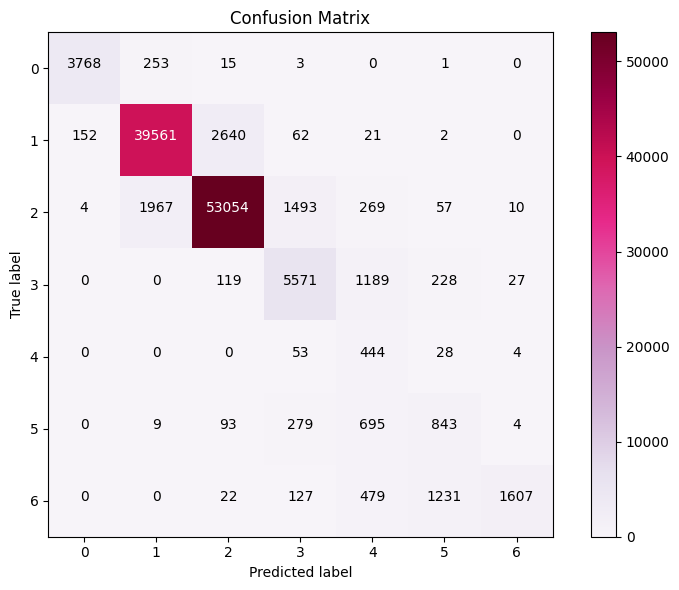

In [32]:
############# plot confusion matrix ############

from matplotlib import pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test_2, test_preds_Ada.round())
# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()


In [ ]:
############# validaition_curve #####################
from sklearn.model_selection import ValidationCurveDisplay
ValidationCurveDisplay.from_estimator(
   AdaBoostClassifier(**trial.params), compressed_dataset_X, y, param_name="n_estimators", param_range=range(50,500,10)
)
plt.show()